### Pokemon Dataset:

Features: 
- `Number`: The ID for each Pok´emon.
- `Name`: The name of each Pok´emon.
- `Type 1`: The primary type of the Pok´emon, determining weaknesses and resistances to
attacks.
- `Type 2`: A secondary type, for Pok´emon with dual types.
- `Total`: The overall CP power, serving as a general indicator of a Pok´emon’s strength.
- `HP`: Hit Points or health, indicating how much damage a Pok´emon can withstand before
fainting.
- `Attack`: The base modifier for normal physical attacks (e.g., Scratch, Punch).
- `Defense`: The base resistance against normal physical attacks.
- `SP Atk`: Special Attack, the base modifier for special attacks (e.g., Fire Blast, Bubble Beam).
- `SP Def`: Special Defense, the base resistance against special attacks.
- `Speed`: Determines the order of Pok´emon’s actions within each round of combat.
- `Generation`: Indicates the generation of Pok´emon games in which the Pok´emon was first
introduced.
- `Legendary`: Indicates whether a Pok´emon is of legendary status, reflecting its rarity and
power.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, mean_squared_error
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB

# Part 1: Data Preparation

1. Load the Pokemon dataset, display the first 10 rows, and describe the dataset

In [33]:
df = pd.read_csv('Pokemon.csv')
df.head(10)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
5,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
7,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
8,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
9,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


2. Check for and report any missing values in the dataset. If any feature has missing values,
report the name of the feature and remove that feature from the dataset.

In [34]:
missing_vals = df.isnull().sum()
missing_vals

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

The feature `type2` has missing values

In [35]:
df = df.drop(columns=['type2'])
df.head(10)

,number,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,525,80,82,83,100,100,80,1,False
5,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False
7,6,Charizard,Fire,534,78,84,78,109,85,100,1,False
8,6,Mega Charizard X,Fire,634,78,130,111,130,85,100,1,False
9,6,Mega Charizard Y,Fire,634,78,104,78,159,115,100,1,False


3. Convert the remaining categorical variables to numerical using one-hot encoding. For both
classification and regression tasks, split the dataset randomly into 80% for training and 20%
for testing, ensuring to set the ‘random state‘ to 42 for reproducibility.

In [36]:
df_encoded = pd.get_dummies(df, columns=['type1'])
df_encoded.head(10)

,number,name,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,type1_Graass,type1_Grass,type1_Ground,type1_Ice,type1_Normal,type1_Poison,type1_Psychic,type1_Rock,type1_Steel,type1_Water
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,False,True,False,False,False,False,False,False,False,False
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,False,True,False,False,False,False,False,False,False,False
2,3,Venusaur,525,80,82,83,100,100,80,1,...,False,True,False,False,False,False,False,False,False,False
3,3,Mega Venusaur,625,80,100,123,122,120,80,1,...,False,True,False,False,False,False,False,False,False,False
4,3,Gigantamax Venusaur,525,80,82,83,100,100,80,1,...,False,True,False,False,False,False,False,False,False,False
5,4,Charmander,309,39,52,43,60,50,65,1,...,False,False,False,False,False,False,False,False,False,False
6,5,Charmeleon,405,58,64,58,80,65,80,1,...,False,False,False,False,False,False,False,False,False,False
7,6,Charizard,534,78,84,78,109,85,100,1,...,False,False,False,False,False,False,False,False,False,False
8,6,Mega Charizard X,634,78,130,111,130,85,100,1,...,False,False,False,False,False,False,False,False,False,False
9,6,Mega Charizard Y,634,78,104,78,159,115,100,1,...,False,False,False,False,False,False,False,False,False,False


In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns=['name', 'legendary']), df_encoded['legendary'], test_size=0.2, random_state=42)

# Part 2: Legendary Prediction

1. Implement a logistic regression classifier to predict whether a Pokemon is legendary. Evaluate
the model using precision, recall, and F-measure. Set ‘max iter=1000‘.

In [38]:
log_regression = LogisticRegression(max_iter=1000)
log_regression.fit(X_train, y_train)
y_pred = log_regression.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8235294117647058
Recall: 0.56
F1 Score: 0.6666666666666666


/Users/vikas/Documents/School/CP322/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Implement a KNN classifier to predict the legendary status of Pokemon. Use 10-fold crossvalidation to determine the best number of neighbors, ensuring the use of Manhattan Distance
as the distance metric. Examine the number of neighbours from 1 to 10, and report the optimal
K value.

In [39]:
best_k = 1
best_score = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f'Optimal K value: {best_k}')
print(f'Best F1 Score: {best_score}')

Optimal K value: 7
Best F1 Score: 0.7798245614035088


3. Discretize all continuous descriptive features into categorical features with ‘KBinsDiscretizer(n bins=3,
encode=’ordinal’, strategy=’uniform’)’ before training a ‘CategoricalNB’ Naive Bayesian model.
Evaluate the classifier’s performance using precision, recall, and F-measure.

In [40]:
cont_features = ['number', 'total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation']
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_train_bin = X_train.copy()
X_test_bin = X_test.copy()

X_train_bin[cont_features] = kbins.fit_transform(X_train[cont_features])
X_test_bin[cont_features] = kbins.transform(X_test[cont_features])

cat_nb = CategoricalNB()
cat_nb.fit(X_train_bin, y_train)
y_pred_nb = cat_nb.predict(X_test_bin)

precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f'Precision (CategoricalNB): {precision_nb}')
print(f'Recall (CategoricalNB): {recall_nb}')
print(f'F1 Score (CategoricalNB): {f1_nb}')

Precision (CategoricalNB): 0.6111111111111112
Recall (CategoricalNB): 0.88
F1 Score (CategoricalNB): 0.7213114754098361


4. Plot ROC curves for the logistic linear model, KNN with the optimal K, and Categorical
Naive Bayesian models developed above to compare their performances. Report which model
yields the best performance.

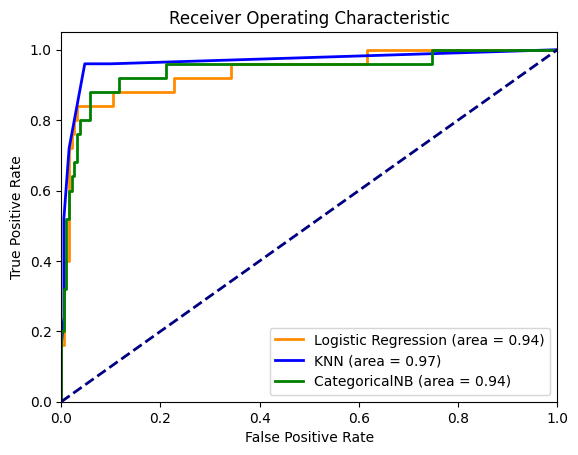

The model with the best performance is KNN with an AUC of 0.97


In [41]:
#logistic regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_regression.predict_proba(X_test)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

#knn
knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn.fit(X_train, y_train)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

#categoricalNB
fpr_nb, tpr_nb, _ = roc_curve(y_test, cat_nb.predict_proba(X_test_bin)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

#plot
plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Logistic Regression (area = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (area = {roc_auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'CategoricalNB (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

best_model = max([('Logistic Regression', roc_auc_log), ('KNN', roc_auc_knn), ('CategoricalNB', roc_auc_nb)], key=lambda x: x[1])
print(f'The model with the best performance is {best_model[0]} with an AUC of {best_model[1]:.2f}')

# Part 3: Combat Power Prediction

1. Use logistic regression to predict the CP power (shown as ‘total’) of a Pokemon, ensuring that
only continuous descriptive features are considered. Set max iter=1000. Evaluate the model
using Mean Squared Error (MSE).

In [46]:
continuous_features = [
    'number', 'hp', 'attack', 'defense', 
    'sp_attack', 'sp_defense', 'speed', 'generation'
]

X_train_cont = X_train[continuous_features]
X_test_cont = X_test[continuous_features]
y_train_total = X_train['total']
y_test_total = X_test['total']

log_regression_cp = LogisticRegression(max_iter=1000)
log_regression_cp.fit(X_train_cont, y_train_total)


y_pred_total = log_regression_cp.predict(X_test_cont)

mse = mean_squared_error(y_test_total, y_pred_total)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 17743.497674418606


/Users/vikas/Documents/School/CP322/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



2. Implement Lasso and Ridge regression model to predict CP power using only continuous
features. Report their performance using MSE.

In [45]:

lasso = Lasso()
lasso.fit(X_train_cont, y_train_total)
y_pred_lasso = lasso.predict(X_test_cont)
mse_lasso = mean_squared_error(y_test_total, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')

ridge = Ridge()
ridge.fit(X_train_cont, y_train_total)
y_pred_ridge = ridge.predict(X_test_cont)
mse_ridge = mean_squared_error(y_test_total, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

Mean Squared Error (Lasso): 0.01390798828961726
Mean Squared Error (Ridge): 0.03522595374352006
